In [1]:
import sys

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# Для удобочитаемого вывода матриц
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

### Задание 1: в папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

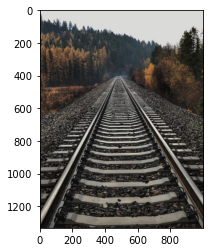

In [4]:
img_rlw = cv.imread("hw/railway.jpeg")
img_rlw = cv.cvtColor(img_rlw, cv.COLOR_BGR2RGB)
plt.imshow(img_rlw)

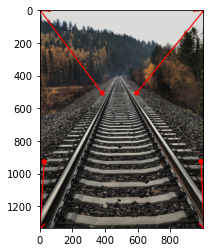

In [5]:
height, width = img_rlw.shape[:2]
pts1 = [
    [379, 507],
    [589, 507],
    [26, 926],
    [981, 926],
]
pts2 = [
    [0, 0],
    [1000, 0],
    [0, 1333],
    [1000, 1333],
]

img_mod = img_rlw.copy()
RED = (255, 0, 0)
for p1, p2 in zip(pts1, pts2):
    cv.circle(img_mod, center=p1, radius=15, color=RED, thickness=-1)
    cv.circle(img_mod, center=p2, radius=15, color=RED, thickness=-1)
    cv.arrowedLine(img_mod, p1, p2, color=RED, thickness=6) 
    
plt.imshow(img_mod, cmap='gray')

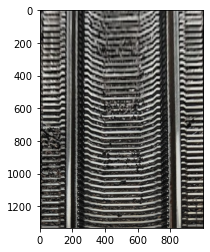

In [7]:
M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
img_res = cv.warpPerspective(image, M, (width, height))

plt.imshow(img_res)

### Задание 2: в папке находится изображение palm.png с пальмой. Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке.

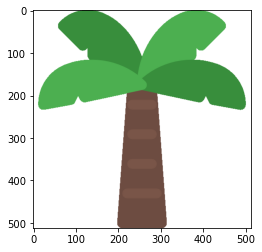

In [8]:
img_palm = cv.imread("hw/palm.png")
img_palm = cv.cvtColor(img_palm, cv.COLOR_BGR2RGB)

plt.imshow(img_palm)

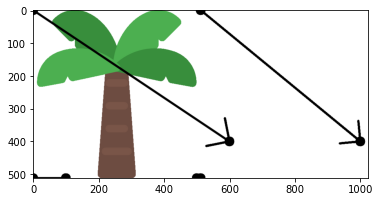

In [9]:
height, width = img_palm.shape[:2]
width *= 2
pts1 = [
    [0, 0],
    [512, 0],
    [0, 512],
    [512, 512],
]
pts2 = [
    [600, 400],
    [1000, 400],
    [100, 512],
    [500, 512],
]

palm_mod = np.zeros((height, width, 3), np.uint8)
palm_mod.fill(255)
palm_mod[0:512, 0:512, :] = img_palm
BLACK = (0, 0, 0)
for p1, p2 in zip(pts1, pts2):
    cv.circle(palm_mod, center=p1, radius=15, color=BLACK, thickness=-1)
    cv.circle(palm_mod, center=p2, radius=15, color=BLACK, thickness=-1)
    cv.arrowedLine(palm_mod, p1, p2, color=BLACK, thickness=6) 
    
plt.imshow(palm_mod)

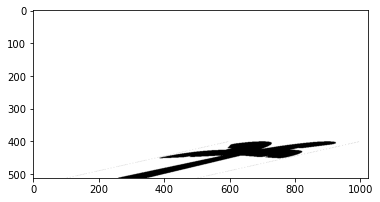

In [11]:
M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
palm_res = cv.warpPerspective(img_palm, M, (width, height))

palm_res[palm_res == 0] = 255

palm_res[palm_res != 255] = 0

plt.imshow(palm_res)

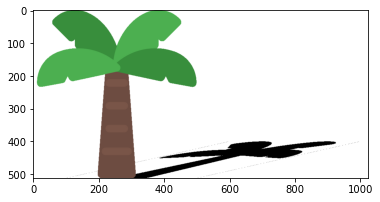

In [12]:
palm_final = palm_res.copy()
for x in range(img_palm.shape[0]):
    for y in range(img_palm.shape[1]):
        if (img_palm[x,y] != 255).all():
            palm_final[x,y] = img_palm[x,y]

plt.imshow(palm_final)